In [1]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# KC House Data
df = pd.read_csv('./kc_house_data.csv')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [3]:
df_train = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'grade', 'lat', 'yr_built', 'sqft_living15']]
df_train.head(10)

,bedrooms,bathrooms,sqft_living,floors,waterfront,grade,lat,yr_built,sqft_living15
0,3,1.00,1180,1.0,0,7,47.5112,1955,1340
1,3,2.25,2570,2.0,0,7,47.7210,1951,1690
2,2,1.00,770,1.0,0,6,47.7379,1933,2720
3,4,3.00,1960,1.0,0,7,47.5208,1965,1360
4,3,2.00,1680,1.0,0,8,47.6168,1987,1800
5,4,4.50,5420,1.0,0,11,47.6561,2001,4760
6,3,2.25,1715,2.0,0,7,47.3097,1995,2238
7,3,1.50,1060,1.0,0,7,47.4095,1963,1650
8,3,1.00,1780,1.0,0,7,47.5123,1960,1780
9,3,2.50,1890,2.0,0,7,47.3684,2003,2390


In [4]:
X = df_train.values
y = df.price.values

In [5]:
print(X.shape)
print(y)

(21613, 9)
[221900. 538000. 180000. ... 402101. 400000. 325000.]


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [7]:
len(X_train),len(X_test)

(17290, 4323)

In [8]:
# Fitting XGB regressor model
# n_estimators: Number of gradient boosted trees. Equivalent to number of boosting rounds.
# max_depth: Maximum tree depth for base learners
# subsample: Subsample ratio of the training instance
xgb_reg = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=75, subsample=0.75, max_depth=7)
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=75, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=0.75, tree_method=None,
       validate_parameters=False, verbosity=None)

In [9]:
# Making Predictions
predictions = xgb_reg.predict(X_test)

In [10]:
from sklearn.metrics import explained_variance_score
# explained_variance_score：解释回归模型的方差得分，其值取值范围是[0,1]，越接近于1说明自变量越能解释因变量的方差变化，值越小则说明效果越差。
print(explained_variance_score(predictions, y_test))

0.8344537846312001


In [11]:
# To convert data table into a matrix
kc_dmatrix_train = xgb.DMatrix(data=X_train, label=y_train, feature_names=df_train)
kc_dmatrix_test = xgb.DMatrix(data=X_test, feature_names=df_train)

In [12]:
# Create the parameter dictionary: params
params = {"objective": "reg:squarederror", "max_depth": 2}

In [13]:
# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=kc_dmatrix_train, num_boost_round=75)

In [14]:
pred = xg_reg.predict(kc_dmatrix_test)

In [15]:
print(explained_variance_score(pred, y_test))

0.8165783466659189


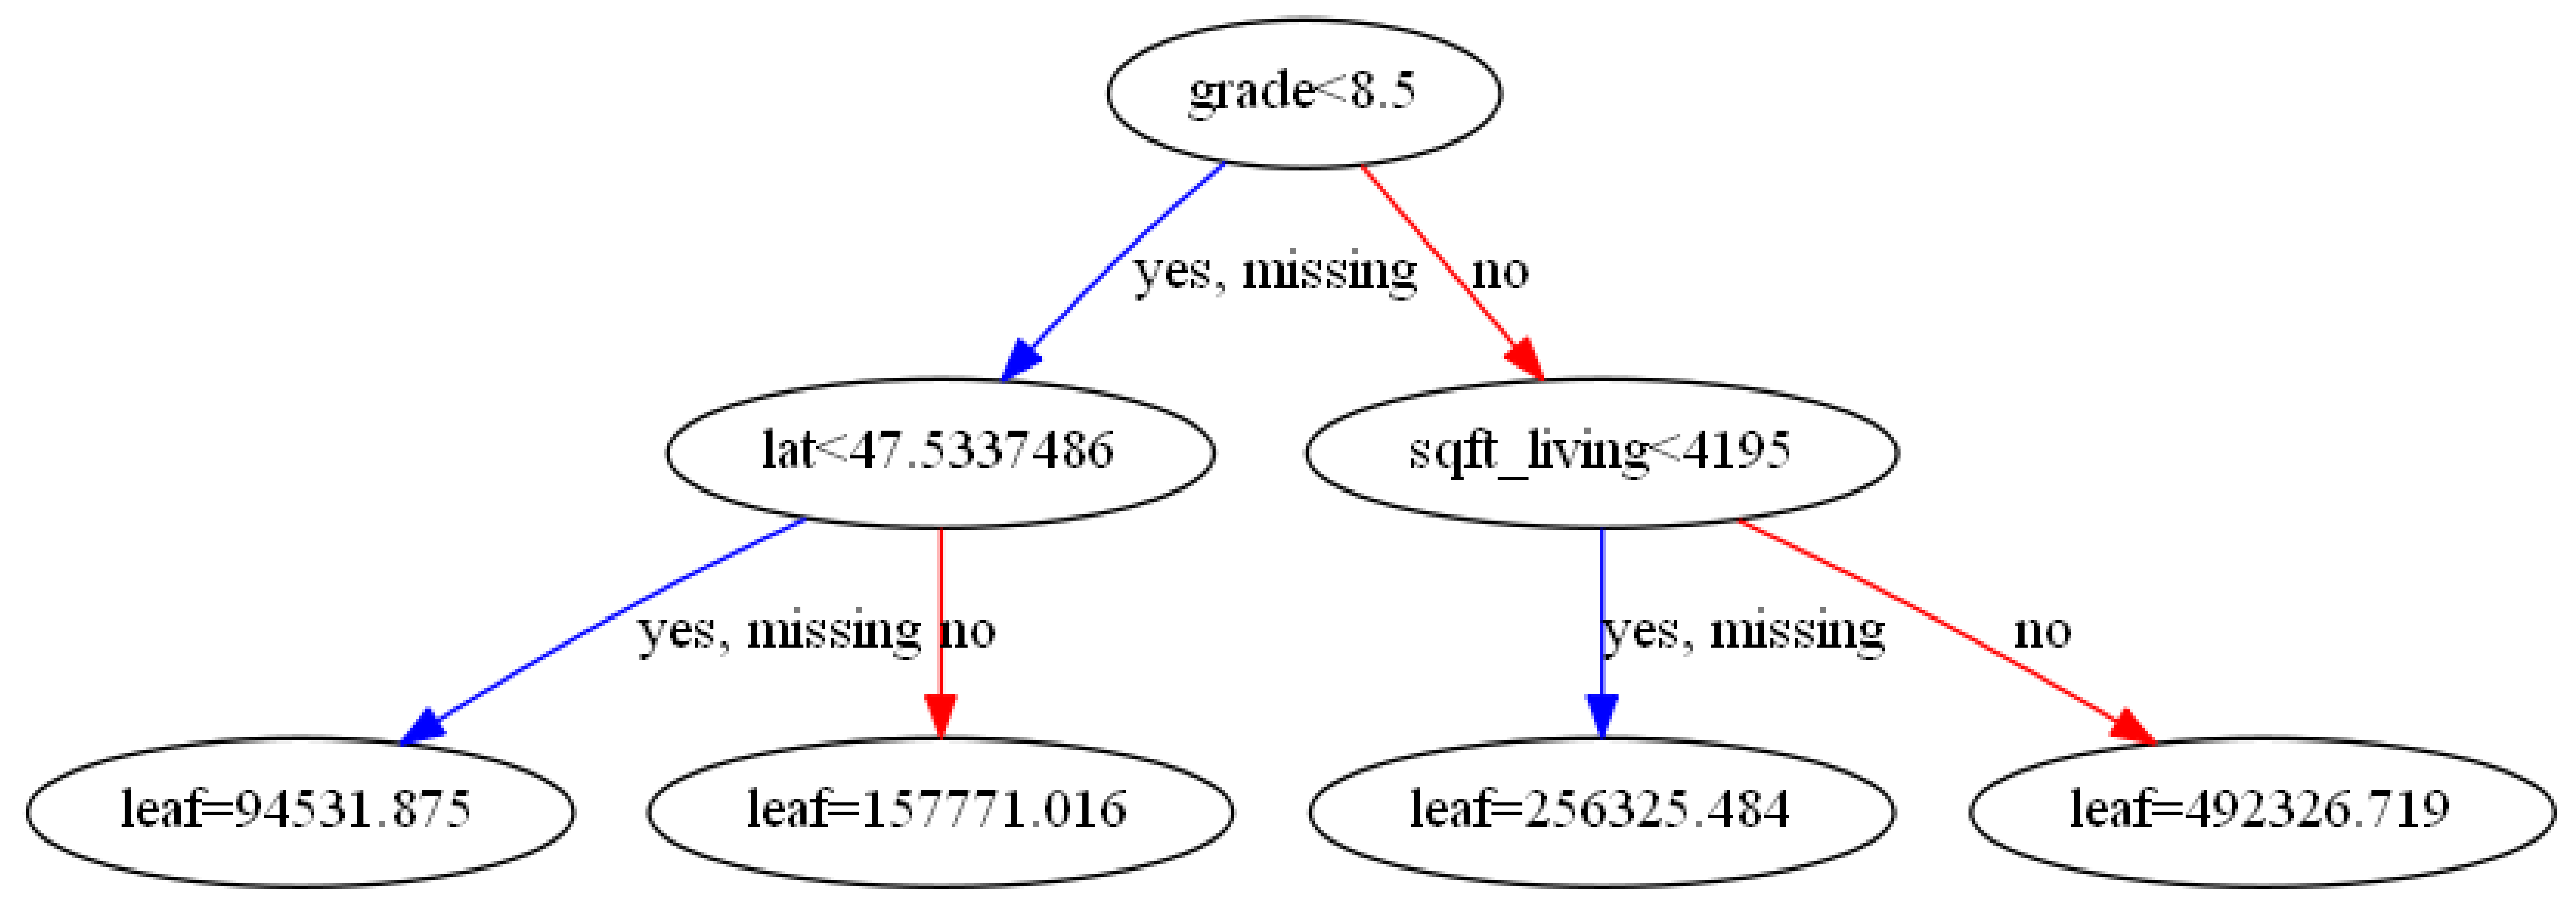

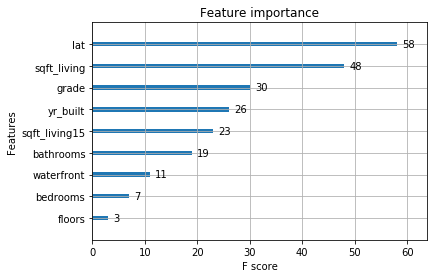

In [16]:
# Plot the first tree as num_trees = 0 and features importance
xgb.plot_tree(xg_reg, num_trees=0)
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree.png')
xgb.plot_importance(xg_reg)
plt.show()